In [465]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [466]:
data_train = pd.read_csv('D:\Data Science\Evaluation projects\Flight_Ticket_Participant_Datasets\Data_Train.csv')
data_test = pd.read_csv('D:\Data Science\Evaluation projects\Flight_Ticket_Participant_Datasets\Test_set.csv')
data_test1 = pd.read_csv('D:\Data Science\Evaluation projects\Flight_Ticket_Participant_Datasets\Sample_submission.csv')
data_test['Price'] = price
data  = pd.concat([data_train, data_test])
print(len(data_test),len(data_train), (len(data_train) + len(data_test)))
data

2671 10683 13354


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [467]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [468]:
# we have only two null values so we will delete those rows

data = data.dropna()
data
print(data.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [472]:
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min


In [470]:
data.drop_duplicates(keep='first',inplace=True)

Lets create few calculated column for better analysis

In [471]:
data['Date_of_Journey'] = pd.DatetimeIndex(data['Date_of_Journey'])
data['Month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
data['Day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
data['dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data['arr_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['arr_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046,6,6,20,30,20,25
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,14086,3,27,14,20,16,55
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720,6,3,21,50,4,25
2669,Air India,2019-06-03,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,23544,6,3,4,0,19,15


In [473]:
data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True)
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,23h 55m,1 stop,No info,14046,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,14086,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,6h 35m,1 stop,No info,22720,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,15h 15m,1 stop,No info,23544,6,3,4,0,19,15


In [487]:
#converting duration into mins
data['Duration'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [492]:
data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min,duration
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,No info,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,1435,1,No info,14046,6,6,20,30,20,25,1435
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,155,0,No info,14086,3,27,14,20,16,55,155
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,395,1,No info,22720,6,3,21,50,4,25,395
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,915,1,No info,23544,6,3,4,0,19,15,915


In [501]:
data.drop(["Route","Additional_Info"],axis=1,inplace=True)
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1,14046,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,155,0,14086,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,395,1,22720,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,915,1,23544,6,3,4,0,19,15


In [525]:
x  = pd.get_dummies(data['Source'],drop_first=False)
data['Source_Banglore'] = x['Banglore']
data['Source_Chennai'] = x['Chennai']
data['Source_Delhi'] = x['Delhi']
data['Source_Kolkata'] = x['Kolkata']
data['Source_Mumbai'] = x['Mumbai']
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,1,10,1,0,0,0,0
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1,14046,6,6,20,30,20,25,0,0,0,1,0
2667,IndiGo,Kolkata,Banglore,155,0,14086,3,27,14,20,16,55,0,0,0,1,0
2668,Jet Airways,Delhi,Cochin,395,1,22720,6,3,21,50,4,25,0,0,1,0,0
2669,Air India,Delhi,Cochin,915,1,23544,6,3,4,0,19,15,0,0,1,0,0


In [527]:
x  = pd.get_dummies(data['Destination'],drop_first=False)
data['Destination_Banglore'] = x['Banglore']
data['Destination_Cochin'] = x['Cochin']
data['Destination_Delhi'] = x['Delhi']
data['Destination_Hyderabad'] = x['Hyderabad']
data['Destination_Kolkata'] = x['Kolkata']
data['Destination_New Delhi'] = x['New Delhi']
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,dep_hour,dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1,14046,6,6,20,30,...,0,0,1,0,1,0,0,0,0,0
2667,IndiGo,Kolkata,Banglore,155,0,14086,3,27,14,20,...,0,0,1,0,1,0,0,0,0,0
2668,Jet Airways,Delhi,Cochin,395,1,22720,6,3,21,50,...,0,1,0,0,0,1,0,0,0,0
2669,Air India,Delhi,Cochin,915,1,23544,6,3,4,0,...,0,1,0,0,0,1,0,0,0,0


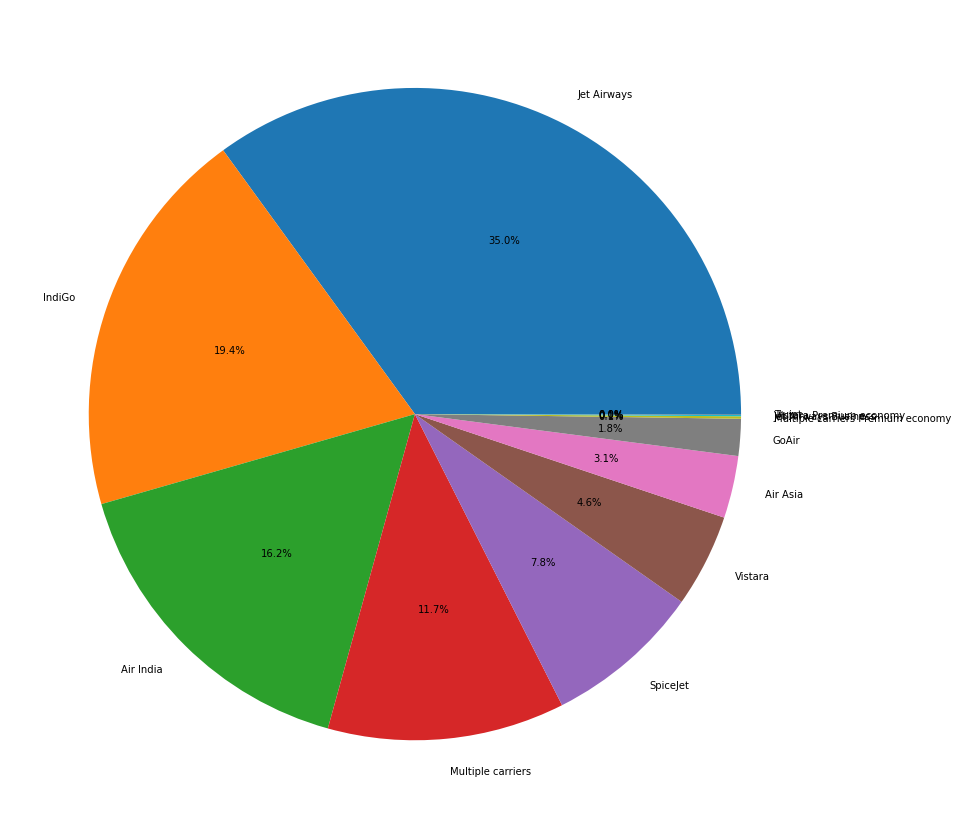

In [497]:
plt.figure(figsize=(15,15))
x = data['Airline'].value_counts().index
plt.pie(data['Airline'].value_counts(), labels = x,autopct='%1.1f%%')
plt.show()

it seems that 35% of the data is of jet airways, followed by indigo with 19.2% and air india with 16.4%

<Figure size 720x720 with 0 Axes>

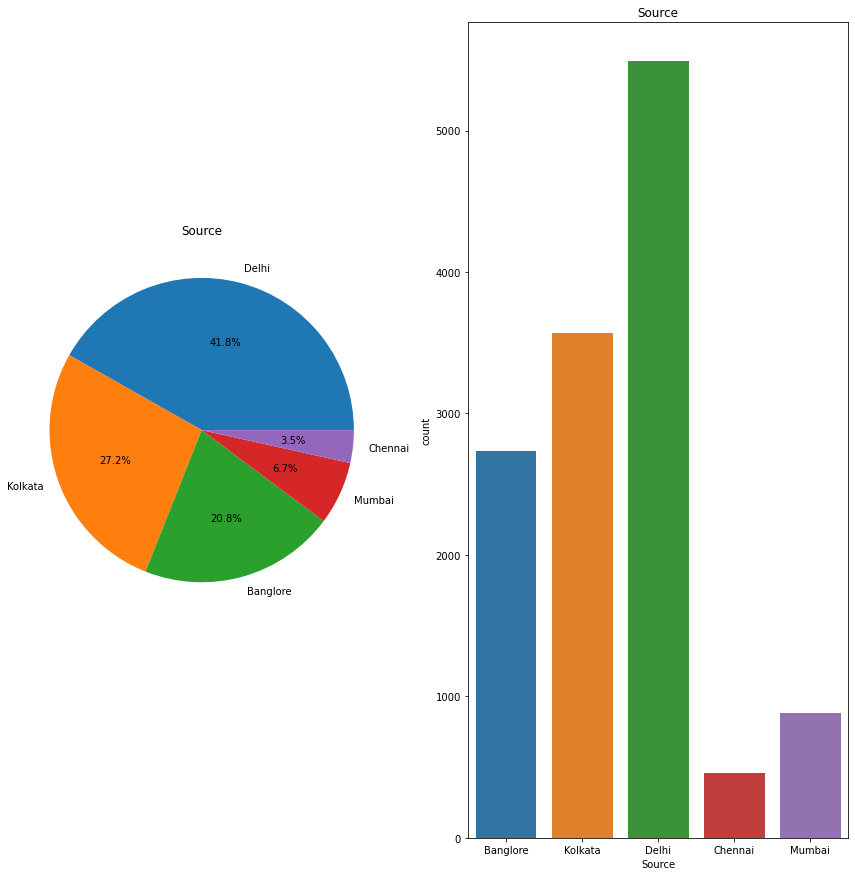

In [498]:
plt.figure(figsize=(10,10))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['Source'].value_counts().index
ax1.pie(data['Source'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Source')
sns.countplot(data['Source'])
ax2.set_title('Source')
plt.show()

most of the flight starts from delhi around 42.5% followed by kolkata abd banglore 26.8% and 20.6% respectively

<Figure size 720x720 with 0 Axes>

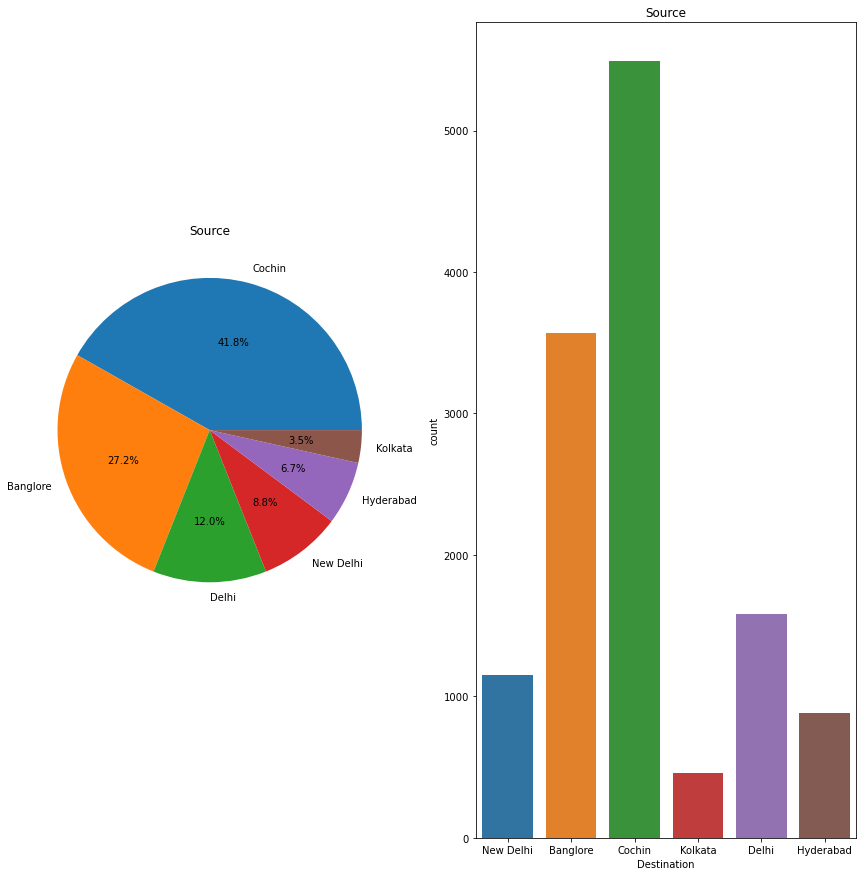

In [499]:
plt.figure(figsize=(10,10))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['Destination'].value_counts().index
ax1.pie(data['Destination'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Source')
sns.countplot(data['Destination'])
ax2.set_title('Source')
plt.show()

cochin, Banglore and delhi(including new delhi) are the three cities with most incoming flights 

<AxesSubplot:xlabel='Month', ylabel='Price'>

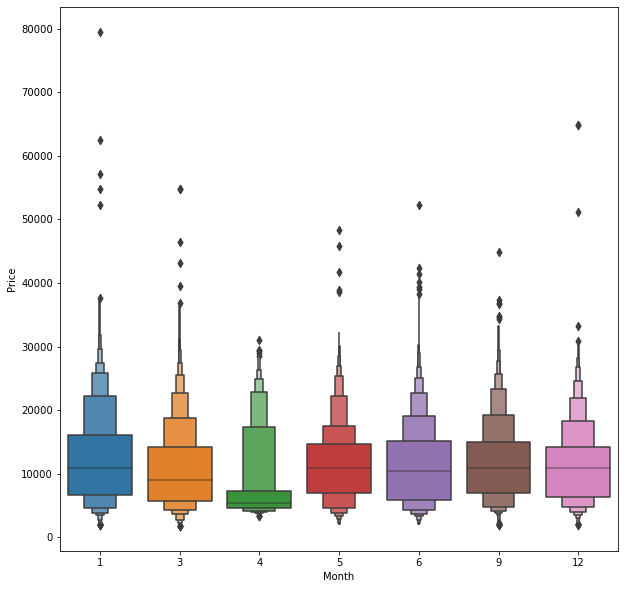

In [502]:
plt.figure(figsize=(10,10))
sns.boxenplot(x=data['Month'],y=data['Price'])

we can see that 4th month is the chapest month to travel

<AxesSubplot:xlabel='dep_hour', ylabel='Price'>

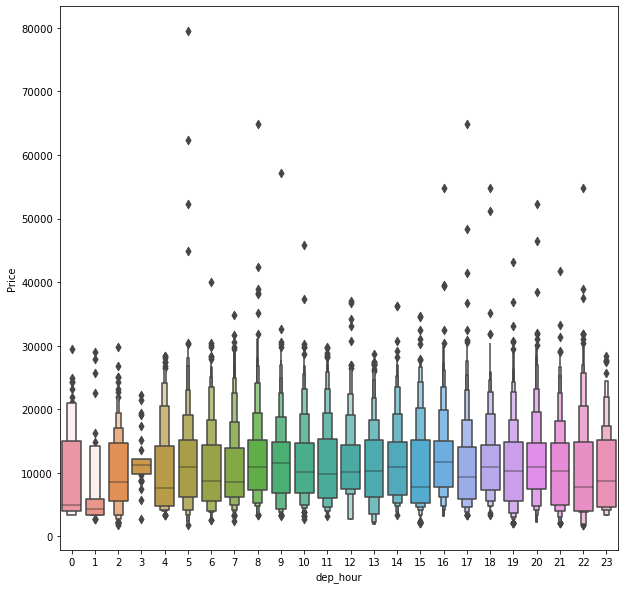

In [503]:
plt.figure(figsize=(10,10))
sns.boxenplot(x=data['dep_hour'],y=data['Price'])

flight that takes off between between 1 AM and 3AM are usually the cheapest 

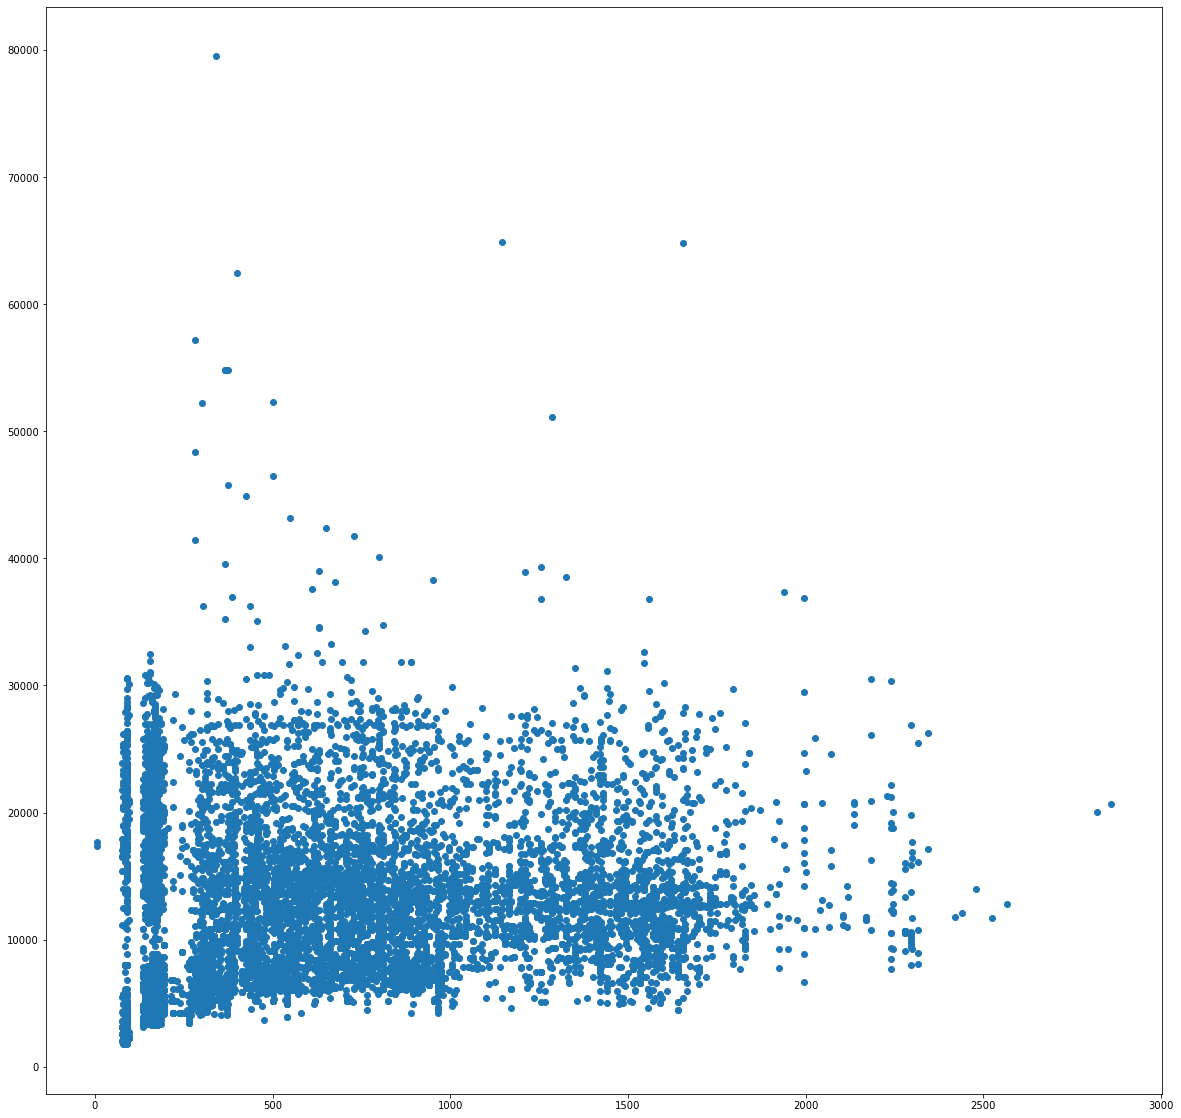

In [511]:
plt.figure(figsize=(20,20))
plt.scatter(x=data['Duration'],y=data['Price'])

it seems there is some correlation between price and duration of the flight

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

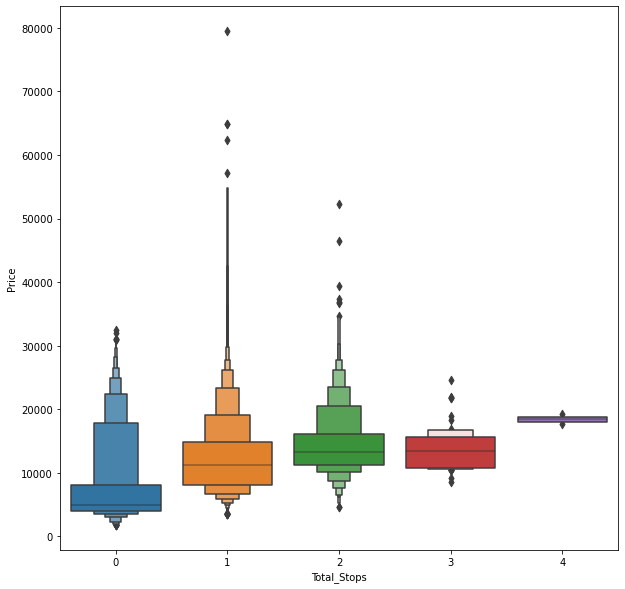

In [504]:
plt.figure(figsize=(10,10))
sns.boxenplot(x=data['Total_Stops'],y=data['Price'])

prices are depandent on the number of stop between source and destination,price increases as the number of layover throughout the route increases increases 

chenni - kolkata, mumbai-hyderabad and banglore -delhi have the cheapest flight ticket on the other hand tha varance of the remaining routes are very high 

<AxesSubplot:xlabel='Airline', ylabel='Price'>

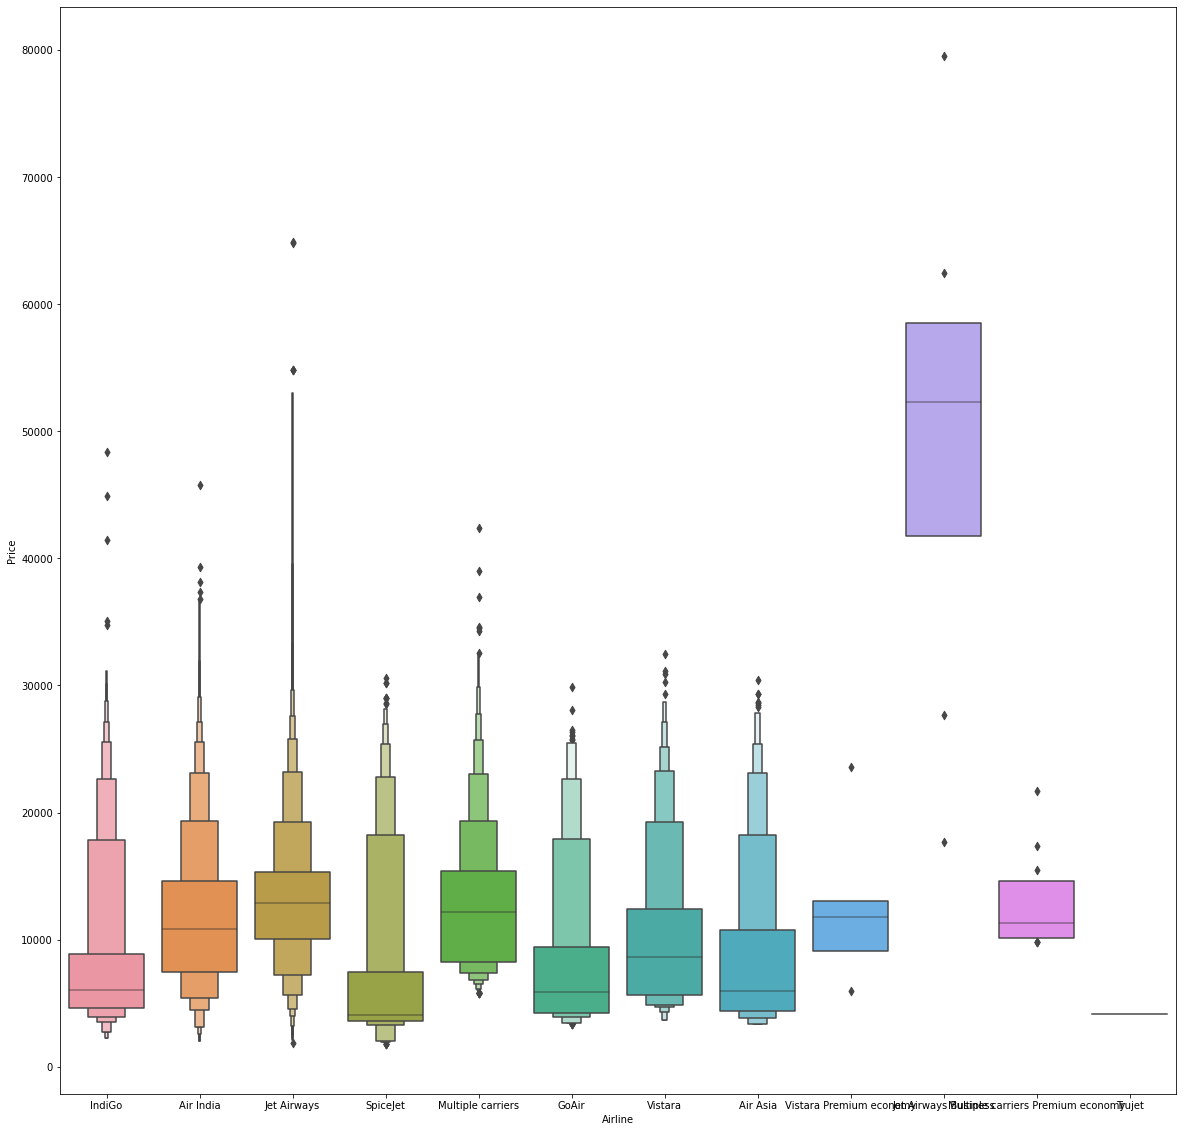

In [505]:
plt.figure(figsize=(20,20))
sns.boxenplot(x=data['Airline'],y=data['Price'])

                                          Price
Airline                                        
Air Asia                            8660.392593
Air India                          11781.216495
GoAir                               8614.733333
IndiGo                              8580.043461
Jet Airways                        13249.685012
Jet Airways Business               49439.750000
Multiple carriers                  12957.987686
Multiple carriers Premium economy  12685.437500
SpiceJet                            7540.565005
Trujet                              4140.000000
Vistara                            10497.014827
Vistara Premium economy            12702.600000


<AxesSubplot:xlabel='Airline'>

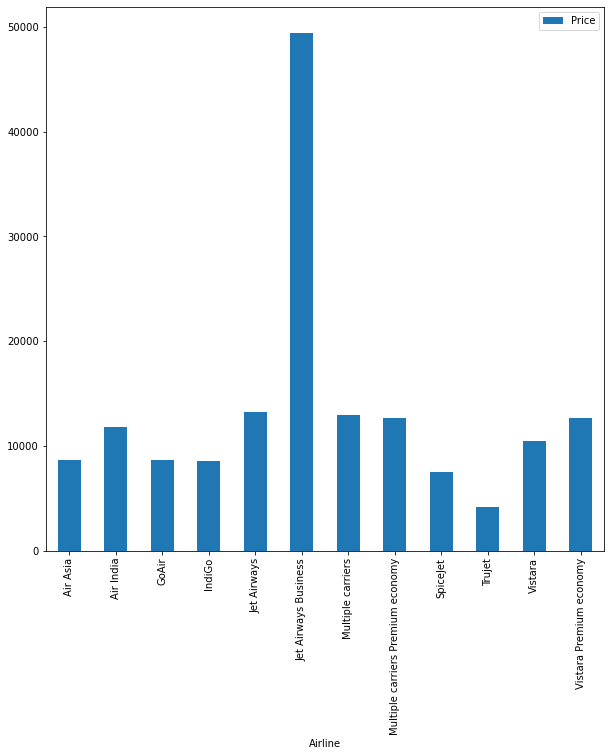

In [506]:
x=data[['Price','Airline']].groupby(['Airline']).mean()
print(x)
x.plot(kind='bar',figsize=(10,10))

trujet is the cheapest airlines with average price of 4140 and jet airways business is the most expensive airline with average price of 49439

# Data Preprocessing

In [528]:
#hecking the null values
data.isna().sum()

Airline                  0
Source                   0
Destination              0
Duration                 0
Total_Stops              0
Price                    0
Month                    0
Day                      0
dep_hour                 0
dep_min                  0
arr_hour                 0
arr_min                  0
Source_Banglore          0
Source_Chennai           0
Source_Delhi             0
Source_Kolkata           0
Source_Mumbai            0
Destination_Banglore     0
Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_New Delhi    0
dtype: int64

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                13133 non-null  object
 1   Source                 13133 non-null  object
 2   Destination            13133 non-null  object
 3   Duration               13133 non-null  int64 
 4   Total_Stops            13133 non-null  int64 
 5   Price                  13133 non-null  int64 
 6   Month                  13133 non-null  int64 
 7   Day                    13133 non-null  int64 
 8   dep_hour               13133 non-null  int64 
 9   dep_min                13133 non-null  int64 
 10  arr_hour               13133 non-null  int64 
 11  arr_min                13133 non-null  int64 
 12  Source_Banglore        13133 non-null  uint8 
 13  Source_Chennai         13133 non-null  uint8 
 14  Source_Delhi           13133 non-null  uint8 
 15  Source_Kolkata      

In [532]:
for i in data.columns:
    if data[i].dtypes == object:
        print(i,' ----- ', data[i].nunique())

Airline  -----  12
Source  -----  5
Destination  -----  6


I will delete followig columns
- Date of journey - we have already extracted date day and month
- Route - we already have source and destination column
- Duration,additional info, Dep_Time and Arrival_Time - data type is object but the number of unique values are way to high

In [533]:
data = data.drop(columns=['Source','Destination'])
data

,Airline,Duration,Total_Stops,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,170,0,3897,3,24,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,445,2,7662,1,5,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,1140,2,13882,9,6,9,25,4,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,325,1,6218,12,5,18,5,23,30,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,285,1,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,1435,1,14046,6,6,20,30,20,25,...,0,0,1,0,1,0,0,0,0,0
2667,IndiGo,155,0,14086,3,27,14,20,16,55,...,0,0,1,0,1,0,0,0,0,0
2668,Jet Airways,395,1,22720,6,3,21,50,4,25,...,0,1,0,0,0,1,0,0,0,0
2669,Air India,915,1,23544,6,3,4,0,19,15,...,0,1,0,0,0,1,0,0,0,0


In [534]:
from sklearn.preprocessing import LabelEncoder

data['Airline'] = LabelEncoder().fit_transform(data['Airline'])
data

,Airline,Duration,Total_Stops,Price,Month,Day,dep_hour,dep_min,arr_hour,arr_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,170,0,3897,3,24,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,1,445,2,7662,1,5,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0
2,4,1140,2,13882,9,6,9,25,4,25,...,0,1,0,0,0,1,0,0,0,0
3,3,325,1,6218,12,5,18,5,23,30,...,0,0,1,0,1,0,0,0,0,0
4,3,285,1,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,1435,1,14046,6,6,20,30,20,25,...,0,0,1,0,1,0,0,0,0,0
2667,3,155,0,14086,3,27,14,20,16,55,...,0,0,1,0,1,0,0,0,0,0
2668,4,395,1,22720,6,3,21,50,4,25,...,0,1,0,0,0,1,0,0,0,0
2669,1,915,1,23544,6,3,4,0,19,15,...,0,1,0,0,0,1,0,0,0,0


<AxesSubplot:>

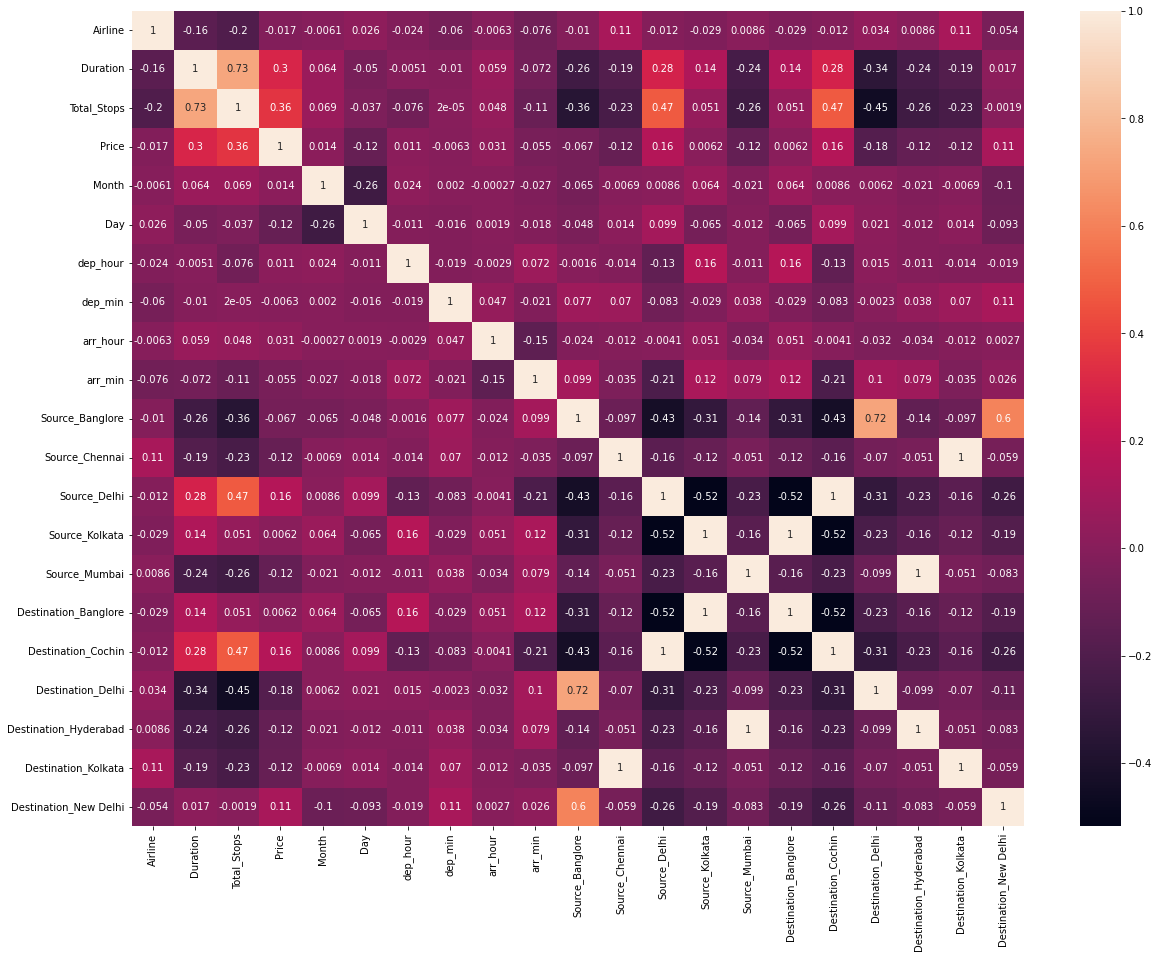

In [535]:
#lets check for the multicolinearity 
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

Multicolinearity has been found so I will delete the following columns
   - Destination banglore
   - destination cohcin
   - source mumbai
   - source chennai

<AxesSubplot:>

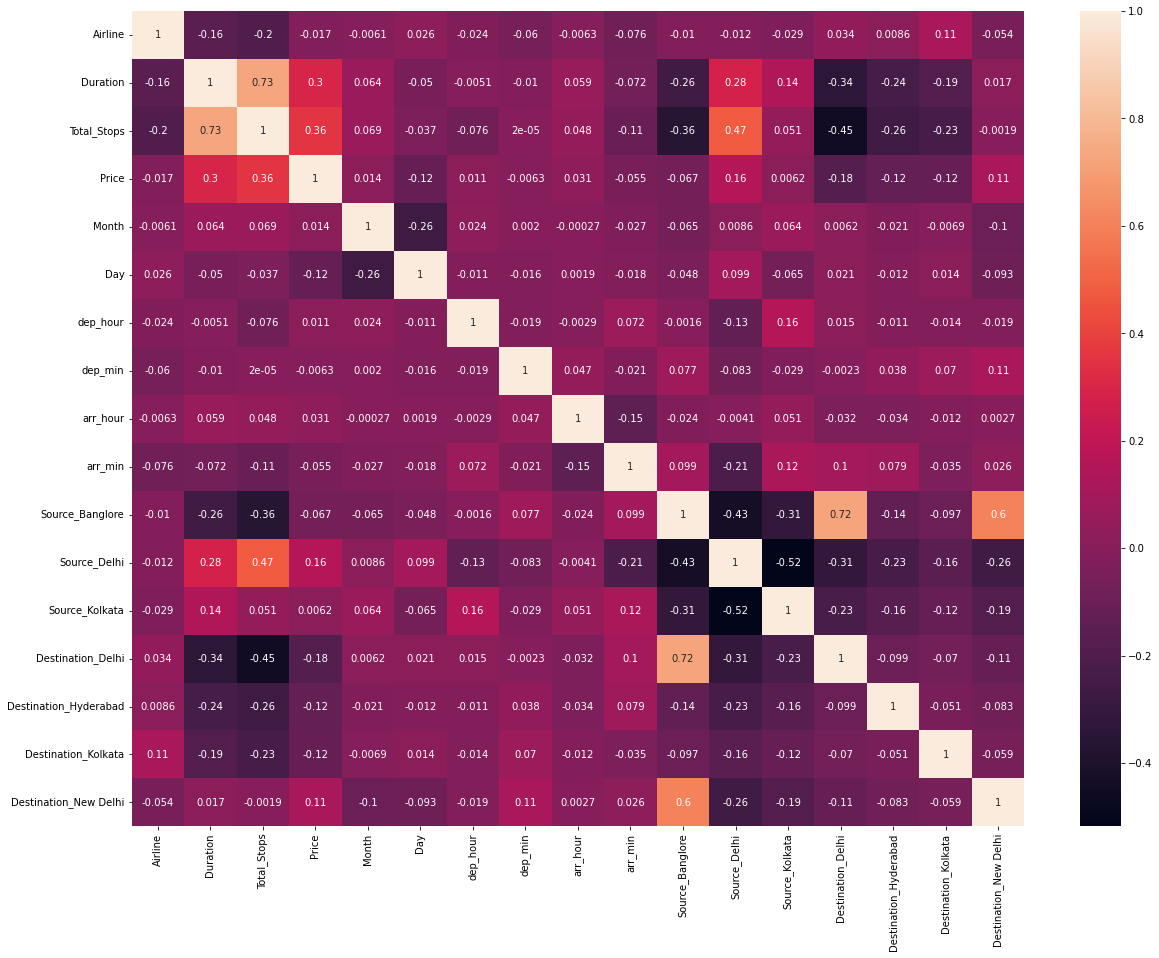

In [536]:
data.drop(columns=['Destination_Banglore','Destination_Cochin','Source_Mumbai','Source_Chennai'],inplace=True)
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

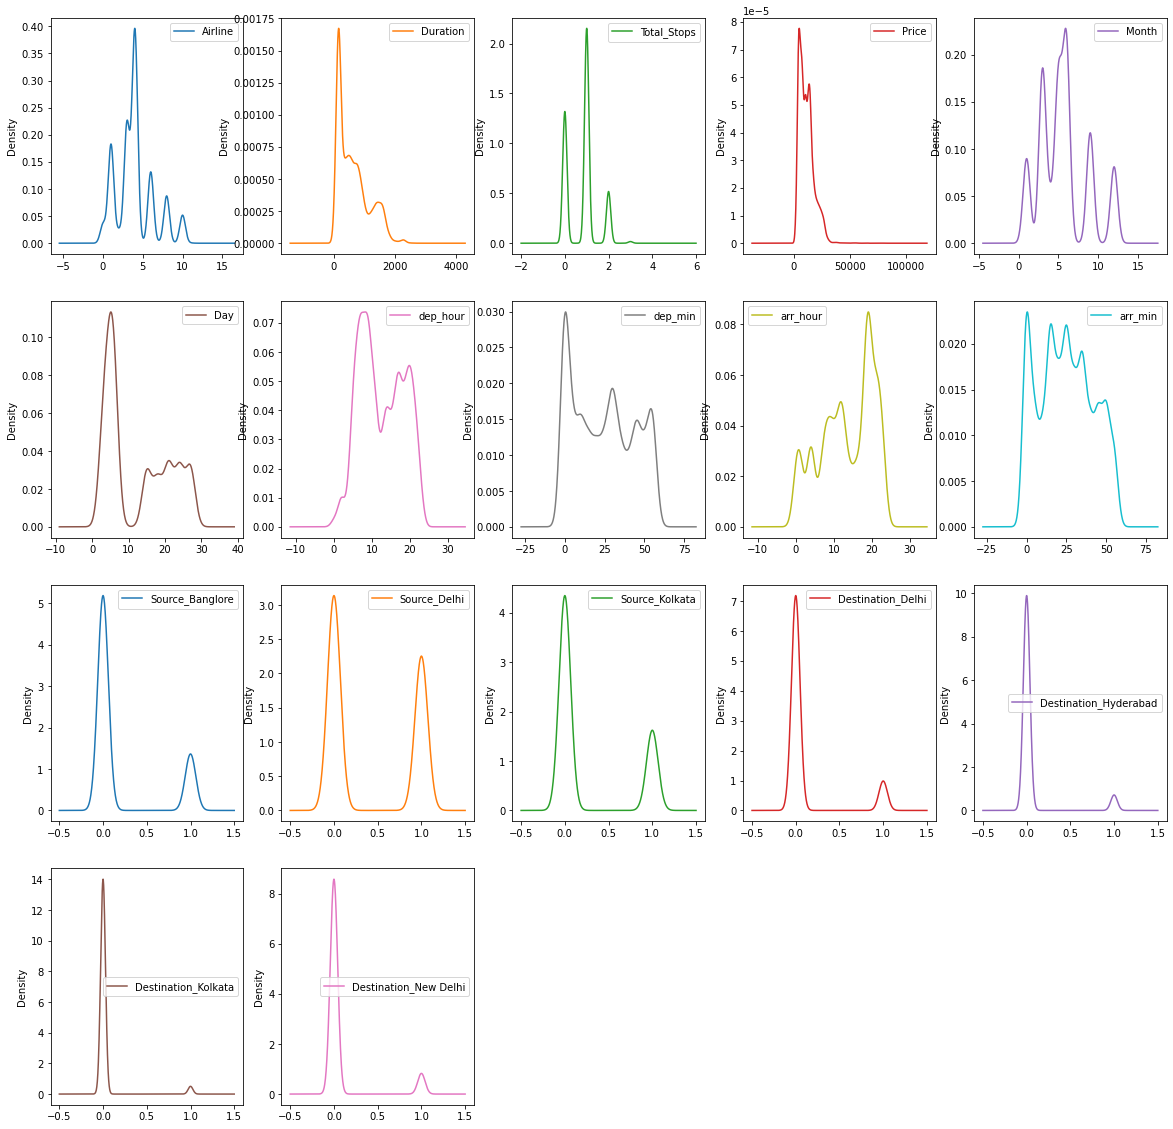

In [538]:
data.plot(kind='density',subplots=True,sharex=False,layout=(4,5),figsize=(20,20))
plt.show()

<AxesSubplot:>

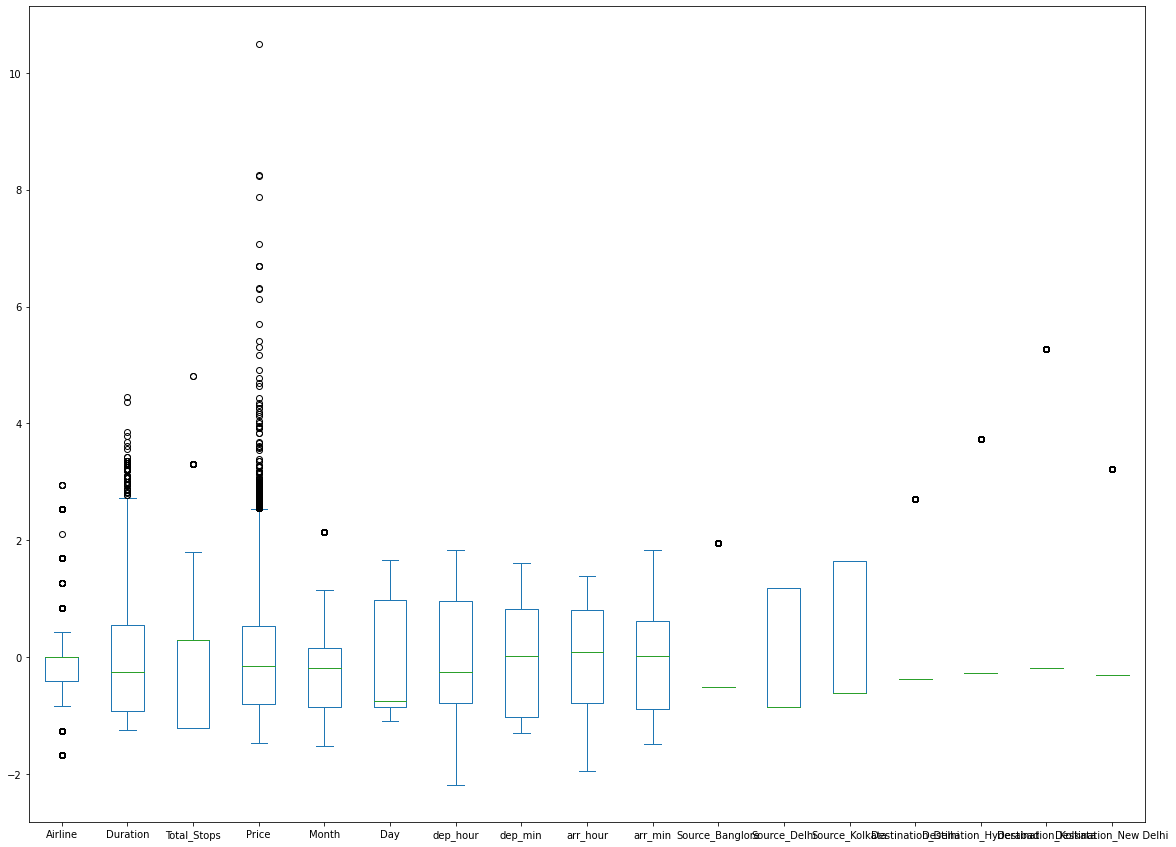

In [539]:
from scipy.stats import zscore

zscore(data).plot(kind='box',figsize=(20,15))

In [552]:
z_score= np.abs(zscore(data[['Price','Duration']]))

data_new = data[(z_score<3).all(axis=1)]

<AxesSubplot:>

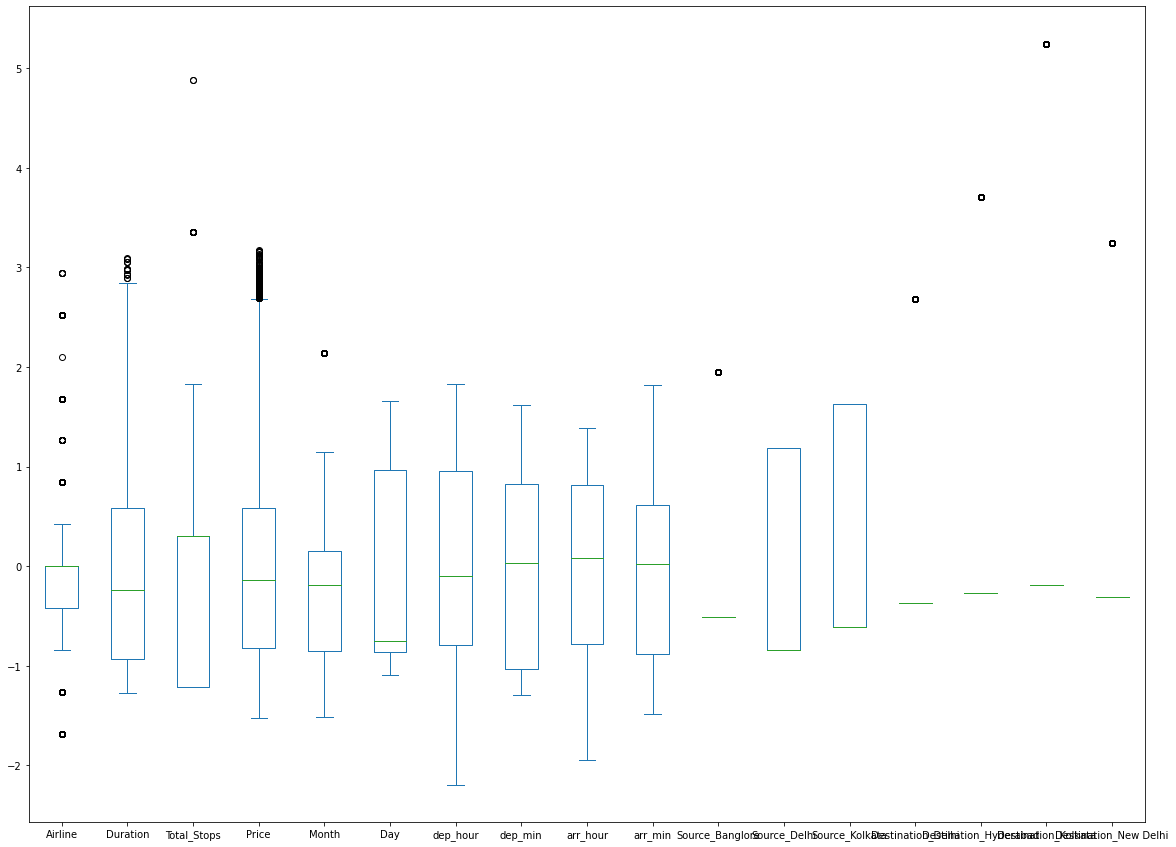

In [553]:
zscore(data_new).plot(kind='box',figsize=(20,15))

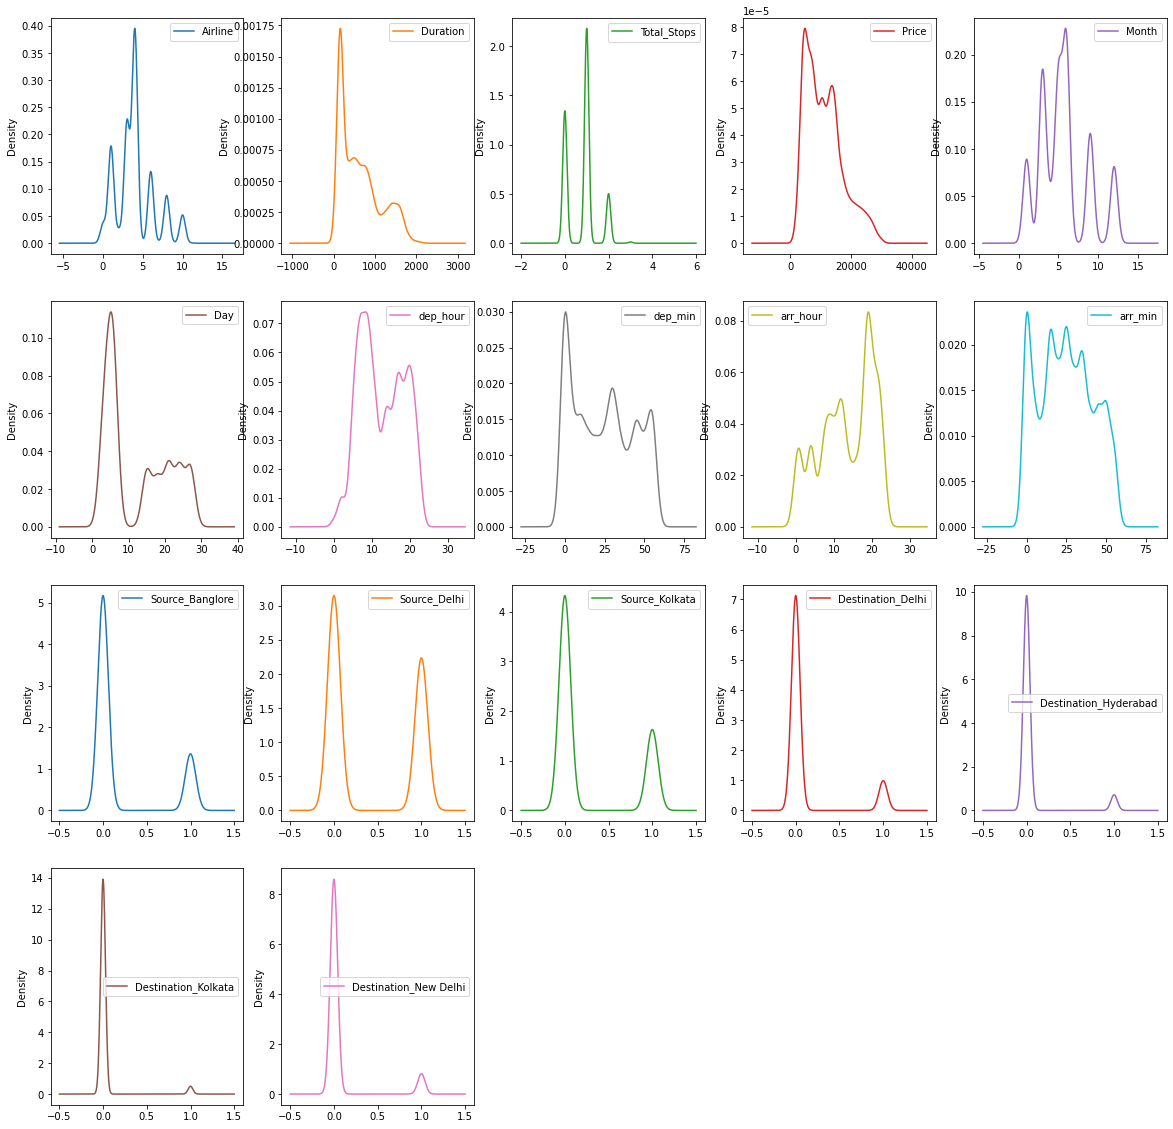

In [543]:
data_new.plot(kind='density',subplots=True,sharex=False,layout=(4,5),figsize=(20,20))
plt.show()

it seems that data looks normally distributed

# Spliting the data

In [557]:
X = data_new.drop(columns='Price')
y = data_new['Price']

len(X)

12985

In [558]:
# we will select best features using chi square technique

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

# selecting best 80 percent features
s_percentile = SelectPercentile(score_func=chi2, percentile=80)
s_percentile = s_percentile.fit(X,y)

col = s_percentile.get_support(indices=True)
features = X.columns[col]

In [559]:
print(features)
print(col)

Index(['Airline', 'Duration', 'Month', 'Day', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')
[ 0  1  3  4  5  6  7  8 12 13 14 15]


In [562]:
X = X[features]
X

,Airline,Duration,Month,Day,dep_hour,dep_min,arr_hour,arr_min,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,170,3,24,22,20,1,10,0,0,0,1
1,1,445,1,5,5,50,13,15,0,0,0,0
2,4,1140,9,6,9,25,4,25,0,0,0,0
3,3,325,12,5,18,5,23,30,0,0,0,0
4,3,285,1,3,16,50,21,35,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,1435,6,6,20,30,20,25,0,0,0,0
2667,3,155,3,27,14,20,16,55,0,0,0,0
2668,4,395,6,3,21,50,4,25,0,0,0,0
2669,1,915,6,3,4,0,19,15,0,0,0,0


# Scaling the data

In [563]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[-4.21671063e-01, -9.29729892e-01, -8.50408741e-01, ...,
        -2.69788539e-01, -1.90559306e-01,  3.24529992e+00],
       [-1.26371624e+00, -3.62819485e-01, -1.51612434e+00, ...,
        -2.69788539e-01, -1.90559306e-01, -3.08137930e-01],
       [-6.48475299e-04,  1.06991772e+00,  1.14673806e+00, ...,
        -2.69788539e-01, -1.90559306e-01, -3.08137930e-01],
       ...,
       [-6.48475299e-04, -4.65894104e-01,  1.48164658e-01, ...,
        -2.69788539e-01, -1.90559306e-01, -3.08137930e-01],
       [-1.26371624e+00,  6.06081937e-01,  1.48164658e-01, ...,
        -2.69788539e-01, -1.90559306e-01, -3.08137930e-01],
       [ 8.41396700e-01,  4.92699856e-01,  1.48164658e-01, ...,
        -2.69788539e-01, -1.90559306e-01, -3.08137930e-01]])

In [582]:

# as I have already performed power transformer I wont be scaling the data
# lets train the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
maxrs = 0
min_mae = 1000000000
for i in range(0,5000):
    x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,random_state=i,test_size=.20)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    mae= mean_squared_error(y_test,y_pred)
    
    if mae<min_mae:
        min_mae = mae
        maxrs = i
        print('best random state = ',maxrs,'maxscore =',min_mae)

best random state =  0 maxscore = 32795984.72450459
best random state =  1 maxscore = 31832221.645254094
best random state =  4 maxscore = 31749819.56043073
best random state =  6 maxscore = 31692343.633504767
best random state =  14 maxscore = 31259371.465817597
best random state =  17 maxscore = 31108610.24667185
best random state =  42 maxscore = 30680991.965158504
best random state =  72 maxscore = 30452625.741096575
best random state =  225 maxscore = 29947131.271741513
best random state =  557 maxscore = 29529380.032599226
best random state =  648 maxscore = 29339308.750720523


In [587]:
x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,random_state=648,test_size=.20)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr.score(x_test,y_test)

0.16346108397842052

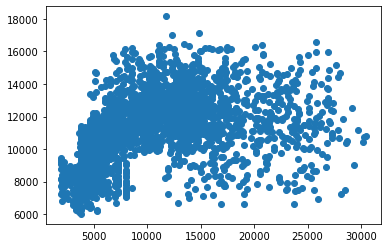

In [588]:
plt.scatter(x=y_test,y=y_pred)